In [ ]:
import utils.generator as gen
import utils.predictor as pred
import utils.optimizer as opt
import utils.activator as act

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Filepath for models<br>
In case you would like to reproduce the work, it is suggested that you download the pre-trained models to this path.

In [2]:
MODELS_PATH = './model/'

### Training

#### Generator - RNN-Nested LSTM

Filepath of dataset used to train the generator. <br>You may use a custom text file (*.txt) with a list of sequences.

In [3]:
gen_dataset = './dataset/generator_dataset.txt'

Loading the dataset as (X, y) for training, where<br>
X:  seed sequences used to train the generator<br>
y:  next amino acid for respective seed sequences

In [4]:
X, y = gen.load_data(gen_dataset)

Loading Data for Training of Generator
Pre-Processing Data for Generator
Featurizing Data for Generator


Training of generator

In [5]:
model_lstm = gen.train_model(X, y)

Creating Model for Generator
Starting Training of Generator
Train on 15847 samples, validate on 3962 samples
Epoch 1/5
15847/15847 [==============================] - 12s 745us/step - loss: 2.7300 - acc: 0.1988 - val_loss: 2.6663 - val_acc: 0.2201
Epoch 2/5
15847/15847 [==============================] - 7s 442us/step - loss: 2.6850 - acc: 0.2105 - val_loss: 2.6612 - val_acc: 0.2201
Epoch 3/5
15847/15847 [==============================] - 7s 442us/step - loss: 2.6822 - acc: 0.2110 - val_loss: 2.6619 - val_acc: 0.2201
Epoch 4/5
15847/15847 [==============================] - 7s 444us/step - loss: 2.6811 - acc: 0.2110 - val_loss: 2.6579 - val_acc: 0.2201
Epoch 5/5
15847/15847 [==============================] - 7s 444us/step - loss: 2.6805 - acc: 0.2110 - val_loss: 2.6626 - val_acc: 0.2201


Saving trained model

In [ ]:
model_lstm.save(filepath=MODELS_PATH+'generator.hdf5')

#### Predictor - Conv1D

Filepath of dataset used to train the predictor. <br>You may use a custom csv file with a list of sequences and biological activity.

In [6]:
pred_dataset = './dataset/predictor_dataset.csv'

Loading dataset as (X, y, X_valid, y_valid, dict_data) for training, where<br>
X, X_valid:  feature maps of sequences used to train and validate the predictor<br>
y, y_valid:  intensities corresponding to the sequences<br>
dict_data:  mean and standard deviation of intensity<br>

In [7]:
X, y, X_valid, y_valid, dict_data = pred.load_data(pred_dataset)

Loading Data for Training of Predictor
Featurizing Data for Predictor


Training of predictor

In [8]:
model_cnn = pred.train_model(X, y)

Creating Model for Predictor
Train on 409 samples, validate on 103 samples
Epoch 1/5
409/409 [==============================] - 2s 6ms/step - loss: 0.7822 - val_loss: 0.5643
Epoch 2/5
409/409 [==============================] - 0s 1ms/step - loss: 0.4313 - val_loss: 0.5010
Epoch 3/5
409/409 [==============================] - 0s 1ms/step - loss: 0.4517 - val_loss: 0.4784
Epoch 4/5
409/409 [==============================] - 0s 1ms/step - loss: 0.4835 - val_loss: 0.4786
Epoch 5/5
409/409 [==============================] - 1s 1ms/step - loss: 0.4194 - val_loss: 0.4812


Saving trained model

In [ ]:
model_cnn.save(filepath=MODELS_PATH+'predictor.hdf5')

Evaluating performance of predictor

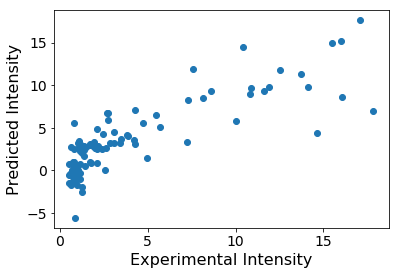

In [9]:
plt.scatter(
    y_valid,
    model_cnn.predict(X_valid)*dict_data['std_Intensity']+dict_data['mean_Intensity']
           )

plt.ylabel('Predicted Intensity', fontdict={'size':16})
plt.xlabel('Experimental Intensity', fontdict={'size':16})
plt.tick_params(labelsize=14)
plt.show()

### Sample and optimize new sequences

Sample 'n' number of seeds using pre-trained generator

In [10]:
n = 2
list_seeds = gen.generate_seed(n, model_lstm_path=MODELS_PATH+'generator.hdf5')
list_seeds

Generating Seeds for Optimizer
Creating Model for Generator
Loading Model for Generator
Generating Seed  1
Generating Seed  2


['CTSTTAKRKKRKKRKKRKKRKKRKKRKKRK', 'LLKTTALLKTTALLKTTALLKTTALLKTTA']

Optimize the generated seeds using directed evolution with pre-trained predictor

In [11]:
ga_df = opt.optimize(list_seeds, model_cnn_path=MODELS_PATH+'predictor.hdf5')

Setting up Optimizer
Loading Model for Predictor
Optimizing Seed  1
Optimizing Seed  2
Post-Processing Optimized Sequences


In [12]:
ga_df.head(2)

,sequences,intensity,length,relative_Arg,relative_charge
11,LLKTTCYLKTTALLKTAILKLTQALLKTTA,5.01687,30,0,0.164989
10,LLKTTAYLKTTALLKTAILKLTQALLKTTA,4.96663,30,0,0.166352


### Gradient activation analysis

Visualize the gradient activation of peptide sequence based on pre-trained predictor

Loading Model for Predictor
Positive activation for feature map


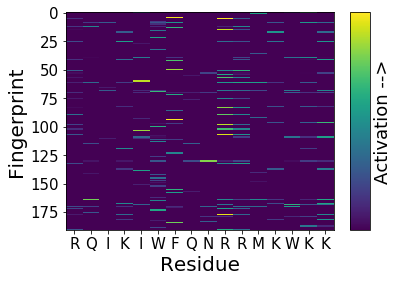

Positive activation averaged over residues


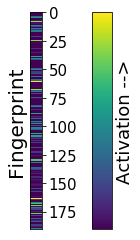

Positive activation averaged over fingerprints


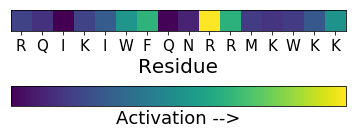

In [13]:
penetratin = 'RQIKIWFQNRRMKWKK'
act.activation_analysis(penetratin, model_cnn_path=MODELS_PATH+'predictor.hdf5')